In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from sklearn.tree import export_graphviz
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from os import system as sys

In [2]:
fuji = pd.read_csv("fuji_full_fp_sample.csv")
fuji = fuji.sample(frac=1).reset_index(drop=True)
fuji

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,113.572072,38.006408,39633038367260806,1055,6388,sv1,bright,39633038367260806,0.096340,0.000011,...,0.952146,-45.774815,2MASSJ07341728+3800231,1,0.0963,17.370,0.750,2.558,-9.999,0.077
1,209.817727,5.221427,39627914978792298,3193,26091,sv3,bright,39627914978792298,0.112726,0.000028,...,3.240610,-39.993076,2MASXJ13591625+0513171,1,0.1127,15.805,0.782,0.365,0.531,0.092
2,194.619267,28.526812,39628449270205263,3317,10401,sv3,bright,39628449270205263,0.061514,0.000014,...,3.417574,87.439476,2MASXJ12582865+2831367,1,0.0615,15.211,0.756,0.901,0.343,0.142
3,182.009105,-0.436829,39627775702728960,3476,26281,sv3,bright,39627775702728960,0.082316,0.000008,...,1.137414,-85.100006,2MASXJ12080218-0026129,1,0.0823,16.892,0.755,1.795,-9.999,0.036
4,148.946407,2.559891,39627847622463100,3426,27344,sv3,bright,39627847622463100,0.080472,0.000020,...,0.702993,21.841816,2MASSJ09554715+0233360,1,0.0805,17.943,0.630,2.495,-9.999,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,182.823194,0.691580,39627805914302221,3465,26284,sv3,bright,39627805914302221,0.078011,0.000033,...,0.922190,-62.069294,2MASSJ12111758+0041295,1,0.0780,17.872,0.721,2.623,-9.999,0.017
6694,185.486802,55.939217,39633335672112224,2690,11186,sv2,bright,39633335672112224,0.033746,0.000012,...,1.862451,-7.226948,2MASXJ12215688+5556215,1,0.0337,15.549,0.689,-9.999,-9.999,0.128
6695,84.616908,-21.116618,39627289658395856,869,21068,sv1,bright,39627289658395856,0.090360,0.000018,...,2.150357,-21.337053,2MASXJ05382805-2106599,1,0.0904,16.536,0.680,1.631,-9.999,0.056
6696,189.676485,62.911705,39633421907004020,3308,11253,sv3,bright,39633421907004020,0.137218,0.000012,...,1.768099,17.307493,2MASXJ12384240+6254420,0,1.6556,17.393,0.750,3.254,0.074,0.086


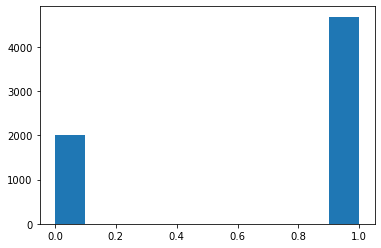

In [3]:
plt.hist(fuji.flag)
plt.show()

In [4]:
# flag_mapping = {0:"Spirals",1:"Ellipticals"}
# fuji.loc[:,"flag"] = fuji.flag.map(flag_mapping)
# fuji

In [5]:
print (len(fuji))

6698


In [6]:
fuji_train = fuji.head(4000)
fuji_test = fuji.tail(2698)

In [7]:
fuji.keys()

Index(['ra_1', 'dec_1', 'targetid_1', 'id', 'healpix', 'survey', 'program',
       'targetid.1', 'z_1', 'zerr', 'zwarn', 'spectype', 'subtype',
       'deltachi2', 'healpix_id', 'obsconditions', 'release', 'brickid_1',
       'brick_objid', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR',
       'snr_ppxf', 'TYPE', 'SERSIC_2', 'Z_PHOT_MEDIAN', 'Z_PHOT_L95', 'mag_g',
       'mag_r', 'mag_z', 'mag_B', 'mag_g_err', 'mag_r_err', 'mag_z_err',
       'fibre_mag_g', 'fibre_mag_r', 'fibre_mag_z', 'uncor_radius',
       'uncor_radius_err', 'BA_ratio', 'BA_ratio_error', 'circ_radius',
       'pos_angle', 'tmass', 'flag', 'z_2', 'rmag', 'g_r_PS1_5_cor', 'W2_W3',
       'W2_W3_err', 'PS1_ibumpy'],
      dtype='object')

In [8]:
cols = ['sersic_1','mag_g','mag_r','mag_z','uncor_radius','BA_ratio','pos_angle','g_r_PS1_5_cor','W2_W3']
cols

['sersic_1',
 'mag_g',
 'mag_r',
 'mag_z',
 'uncor_radius',
 'BA_ratio',
 'pos_angle',
 'g_r_PS1_5_cor',
 'W2_W3']

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [10]:
clf.fit(fuji_train[cols],fuji_train.flag)

DecisionTreeClassifier(max_depth=5)

In [11]:
train_predictions = clf.predict(fuji_train[cols])

In [12]:
test_predictions = clf.predict(fuji_test[cols])

In [13]:
train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
train_accuracy

0.86825

In [14]:
test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
test_accuracy

0.8395107487027428

In [15]:
train_accuracies = []; test_accuracies= []; depth = []
for i in range(24):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(fuji_train[cols],fuji_train.flag)
    train_predictions = clf.predict(fuji_train[cols])
    test_predictions = clf.predict(fuji_test[cols])
    train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
    test_accuracies.append(test_accuracy)
    depth.append(i+1)

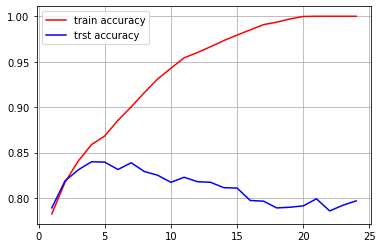

In [16]:
plt.plot(depth,train_accuracies, color="red",label="train accuracy")
plt.plot(depth,test_accuracies, color="blue",label="trst accuracy")
plt.grid()
plt.legend()
plt.show()

In [17]:
fuji_train["flag"].values

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
#to do that all what you need is to uncomment cell #3 which change 0 to spirals and 1 to ellipticals
# export_graphviz(
#             clf,
#             out_file="fuji_tree.dot",
#             feature_names=cols,
#             class_names=fuji_train.flag,
#             rounded=True,
#             filled=True
#         )
# sys("dot -Tpng fuji_tree.dot -o fuji_tree.png")

In [19]:
metrics.f1_score(fuji_test.flag, test_predictions)

0.8549497088406566

In [20]:
metrics.precision_score(fuji_test.flag, test_predictions, average="macro")

0.7586828962485377

In [21]:
metrics.precision_score(fuji_test.flag, test_predictions, average="micro")

0.7968865826538176

In [23]:
metrics.precision_score(fuji_test.flag, test_predictions, average="weighted")

0.7964644424725438

In [24]:
metrics.roc_auc_score(fuji_test.flag, test_predictions)

0.757588322563457